<a href="https://colab.research.google.com/github/aghnisyaa/bioactivity_project/blob/main/CDD_ML_Part_2_Exploratory_Data_Analysis_new_rdrp_dengue_virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [30]:
!python --version


Python 3.7.6


In [14]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-11-25 10:26:33--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.4’

Miniconda3-py37_4.8 100%[===================>]  81.12M   195MB/s    in 0.4s    

2024-11-25 10:26:33 (195 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.4’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.

## **Load bioactivity data**

In [15]:
import pandas as pd

In [33]:
df = pd.read_csv('bioactivity_data_preprocessed_new.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [34]:
!pip install rdkit

In [35]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [36]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [37]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [38]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,531.204,-1.13022,7.0,14.0
1,524.169,-1.57400,7.0,14.0
2,498.167,-2.11080,7.0,12.0
3,508.162,-2.49750,7.0,12.0
4,522.189,-2.10740,7.0,12.0
...,...,...,...,...
66,248.303,3.05080,1.0,3.0
67,433.489,4.09740,2.0,5.0
68,433.489,4.09740,2.0,5.0
69,416.890,4.88920,1.0,6.0


In [39]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,340.0
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,360.0
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,5000.0
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,1600.0
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,2000.0
...,...,...,...,...
66,CHEMBL5182967,COc1ccc(CC(=O)O)cc1-c1cccs1,inactive,140000.0
67,CHEMBL583412,O=C(O)c1ccccc1NS(=O)(=O)c1cccc(-c2cnn(Cc3ccccc...,intermediate,5200.0
68,CHEMBL583412,O=C(O)c1ccccc1NS(=O)(=O)c1cccc(-c2cnn(Cc3ccccc...,intermediate,4600.0
69,CHEMBL5192551,O=C1N/C(=N\c2nnc(-c3ccccc3Cl)s2)S/C1=C\c1cccc(...,intermediate,2100.0


Now, let's combine the 2 DataFrame

In [40]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [41]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,340.0,531.204,-1.13022,7.0,14.0
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,360.0,524.169,-1.57400,7.0,14.0
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,5000.0,498.167,-2.11080,7.0,12.0
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,1600.0,508.162,-2.49750,7.0,12.0
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,2000.0,522.189,-2.10740,7.0,12.0
...,...,...,...,...,...,...,...,...
66,CHEMBL5182967,COc1ccc(CC(=O)O)cc1-c1cccs1,inactive,140000.0,248.303,3.05080,1.0,3.0
67,CHEMBL583412,O=C(O)c1ccccc1NS(=O)(=O)c1cccc(-c2cnn(Cc3ccccc...,intermediate,5200.0,433.489,4.09740,2.0,5.0
68,CHEMBL583412,O=C(O)c1ccccc1NS(=O)(=O)c1cccc(-c2cnn(Cc3ccccc...,intermediate,4600.0,433.489,4.09740,2.0,5.0
69,CHEMBL5192551,O=C1N/C(=N\c2nnc(-c3ccccc3Cl)s2)S/C1=C\c1cccc(...,intermediate,2100.0,416.890,4.88920,1.0,6.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [72]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))  # Calculate pIC50

    input['pIC50'] = pIC50  # Add the pIC50 column
    x = input.drop('standard_value_norm', axis=1)  # Drop the norm column

    return x


Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [73]:
df_combined.standard_value.describe()

,standard_value
count,71.000000
mean,87700.098592
std,140481.221421
min,16.000000
25%,2300.000000
50%,11400.000000
75%,125000.000000
max,452000.000000


In [74]:
-np.log10( (10**-9)* 100000000 )

1.0

In [75]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [90]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    # Correctly specify the axis keyword
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [91]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.204,-1.13022,7.0,14.0,340.0
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.169,-1.57400,7.0,14.0,360.0
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,498.167,-2.11080,7.0,12.0,5000.0
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,508.162,-2.49750,7.0,12.0,1600.0
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,522.189,-2.10740,7.0,12.0,2000.0
...,...,...,...,...,...,...,...,...
66,CHEMBL5182967,COc1ccc(CC(=O)O)cc1-c1cccs1,inactive,248.303,3.05080,1.0,3.0,140000.0
67,CHEMBL583412,O=C(O)c1ccccc1NS(=O)(=O)c1cccc(-c2cnn(Cc3ccccc...,intermediate,433.489,4.09740,2.0,5.0,5200.0
68,CHEMBL583412,O=C(O)c1ccccc1NS(=O)(=O)c1cccc(-c2cnn(Cc3ccccc...,intermediate,433.489,4.09740,2.0,5.0,4600.0
69,CHEMBL5192551,O=C1N/C(=N\c2nnc(-c3ccccc3Cl)s2)S/C1=C\c1cccc(...,intermediate,416.890,4.88920,1.0,6.0,2100.0


In [92]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,71.000000
mean,87700.098592
std,140481.221421
min,16.000000
25%,2300.000000
50%,11400.000000
75%,125000.000000
max,452000.000000


In [93]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.204,-1.13022,7.0,14.0,6.468521
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.169,-1.57400,7.0,14.0,6.443697
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,498.167,-2.11080,7.0,12.0,5.301030
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,508.162,-2.49750,7.0,12.0,5.795880
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,522.189,-2.10740,7.0,12.0,5.698970
...,...,...,...,...,...,...,...,...
66,CHEMBL5182967,COc1ccc(CC(=O)O)cc1-c1cccs1,inactive,248.303,3.05080,1.0,3.0,3.853872
67,CHEMBL583412,O=C(O)c1ccccc1NS(=O)(=O)c1cccc(-c2cnn(Cc3ccccc...,intermediate,433.489,4.09740,2.0,5.0,5.283997
68,CHEMBL583412,O=C(O)c1ccccc1NS(=O)(=O)c1cccc(-c2cnn(Cc3ccccc...,intermediate,433.489,4.09740,2.0,5.0,5.337242
69,CHEMBL5192551,O=C1N/C(=N\c2nnc(-c3ccccc3Cl)s2)S/C1=C\c1cccc(...,intermediate,416.890,4.88920,1.0,6.0,5.677781


In [94]:
df_final.pIC50.describe()

,pIC50
count,71.000000
mean,4.906246
std,1.051799
min,3.344862
25%,3.906240
50%,4.943095
75%,5.638272
max,7.795880


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [95]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.204,-1.13022,7.0,14.0,6.468521
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.169,-1.57400,7.0,14.0,6.443697
5,CHEMBL486231,C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,inactive,500.158,-1.13360,6.0,11.0,4.744727
6,CHEMBL4127921,C#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,inactive,510.153,-1.52030,6.0,11.0,4.798603
7,CHEMBL4129313,CC#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,inactive,524.180,-1.13020,6.0,11.0,4.698970
9,CHEMBL4125966,C#C[C@]1(O)[C@H](n2ccc(=O)[nH]c2=O)O[C@](F)(CO...,active,526.152,-2.20030,7.0,12.0,6.187087
11,CHEMBL4282493,COc1cc(C)c(C(=O)NS(=O)(=O)c2cccc3cccnc23)cc1-c...,active,492.578,3.74282,2.0,7.0,7.795880
12,CHEMBL4287909,O=C(OC1=CS(=O)(=O)Nc2ccc(Oc3ccccc3Br)cc21)c1cc...,inactive,472.316,5.15210,1.0,5.0,4.511449
17,CHEMBL4291731,COc1cccc(Oc2ccc3c(c2)C(OC(=O)c2ccccc2)=CS(=O)(...,inactive,423.446,4.39820,1.0,6.0,4.692504
18,CHEMBL4277678,CC(C)(C)c1cccc(Oc2ccc3c(c2)C(OC(=O)c2ccccc2)=C...,inactive,449.528,5.68710,1.0,5.0,4.801343


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [96]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

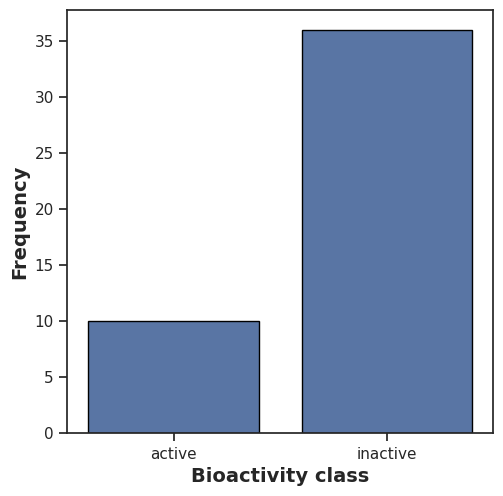

In [97]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

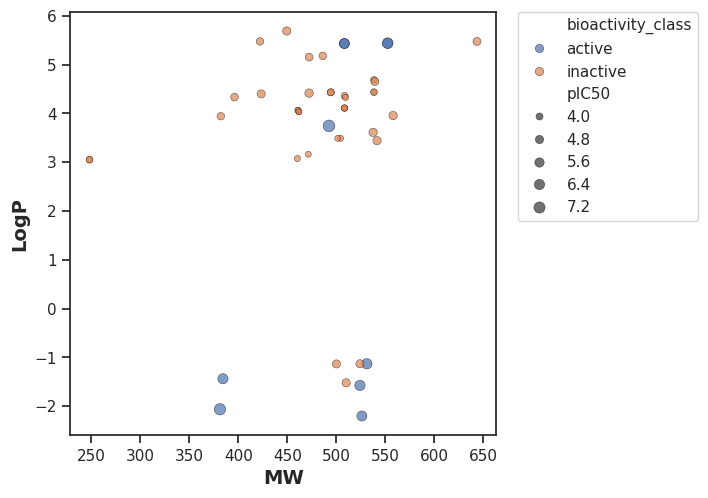

In [98]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

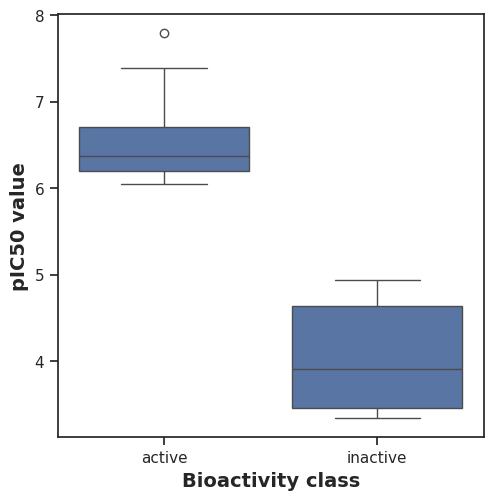

In [99]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [100]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [101]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,360.0,0.000002,0.05,Different distribution (reject H0)


#### **MW**

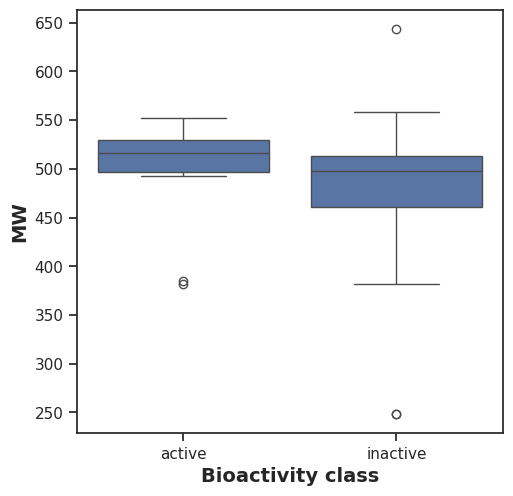

In [102]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [103]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,214.0,0.372035,0.05,Same distribution (fail to reject H0)


#### **LogP**

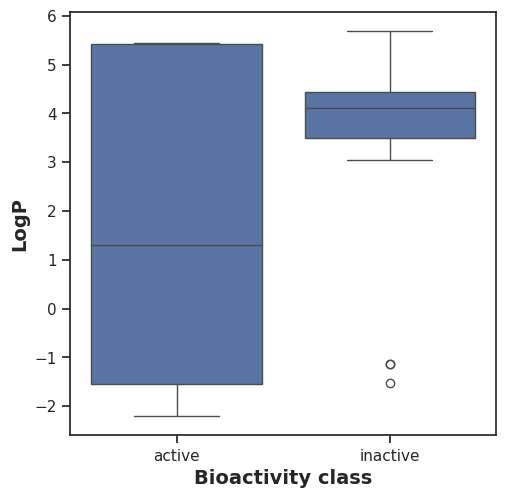

In [104]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [105]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,146.0,0.372227,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

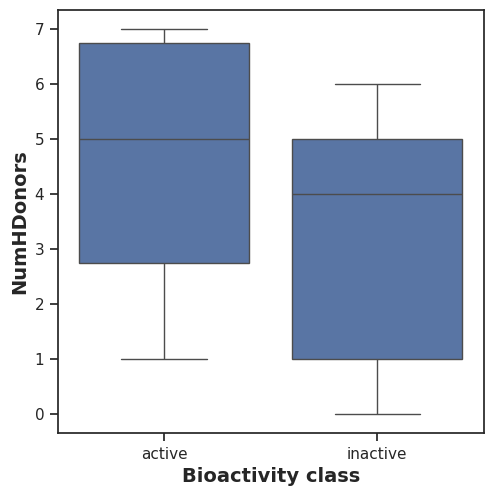

In [106]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [107]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,252.5,0.051287,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

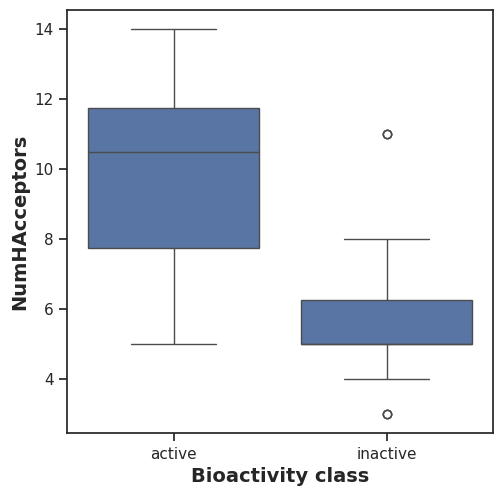

In [108]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [110]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,296.5,0.001519,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [113]:
! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: plot_MW_vs_LogP.pdf (deflated 22%)
updating: bioactivity_preprocessed_data.csv (deflated 77%)
updating: plot_NumHDonors.pdf (deflated 37%)
updating: plot_LogP.pdf (deflated 37%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
updating: plot_MW.pdf (deflated 39%)
updating: plot_NumHAcceptors.pdf (deflated 37%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: bioactivity_data_preprocessed_new.csv (deflated 78%)
updating: plot_ic50.pdf (deflated 37%)
